This notebook will look into the effect of different parameter values on the results of simulation

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
def plot_dataframe(eval_df, eval_type, eval_metric, ax):
    means = eval_df.groupby('method')[eval_metric].mean().sort_values(ascending=True)
    sns.barplot(data=eval_df, x='method', y=eval_metric, hue='method', order=means.index.to_list(), ax=ax)
    for method, value in means.items():
        ax.text(means.index.get_loc(method), value, round(value, 3), ha='center', va='bottom')
    ax.set_title(f'Evaluation of models for type: {eval_type}')
    ax.set_ylim([0, min(max(means)*1.15, 1)])

This code will evaluate the models in predicting the following targets:
- `W_mean`: The true group connectivity weights generated
- `W_ind`: The true connectivity weights of individuals
- `Y_mean`: (true group X) @ (true group W)
- `Y_star`: (true individual X) @ (true individual W)
- `Y_1`: $Y^* + \epsilon_1$ which the models are trained on (train data)
- `Y_2`: $Y^* + \epsilon_2$ which the models haven't seen (test data)

In [18]:
save_path = '/cifs/diedrichsen/data/Cerebellum/connectivity/SUIT3/bayes_simulation/'
eval_metrics = ['R']
eval_types = {
    'W_mean':   ('W',   'mean',   False),
    'W_ind':    ('W',   'ind',    False),
    'Y_mean':   ('Y',   'mean',   False),     # X_mean @ W_mean
    'Y_star':   ('Y',   'star',   False),     # individual activations without measurement noise
    'Y_1':      ('Y',   'ind',    False),
    'Y_2':      ('Y',   'ind',    True),
    }

The parameters of simulation for different sets are:

if `param_set=3`:
$$X_{group} \sim \mathcal{N}(0, 1.1e-2), \qquad X_{ind} \sim \mathcal{N}(X_{group}, 0)$$
$$W_{group} \sim \mathcal{N}(2.5e-2, 1.3e-7), \qquad W_{ind} \sim \mathcal{N}(W_{group}, 1.1e-6)$$

if `param_set=2`:
$$X_{group} \sim \mathcal{N}(0, 1.1e-2), \qquad X_{ind} \sim \mathcal{N}(X_{group}, 0)$$
$$W_{group} \sim \mathcal{N}(2.5e-3, 1.3e-7), \qquad W_{ind} \sim \mathcal{N}(W_{group}, 1.1e-6)$$

if `param_set=1`:
$$X_{group} \sim \mathcal{N}(0, 1.1e-2), \qquad X_{ind} \sim \mathcal{N}(X_{group}, 0)$$
$$W_{group} \sim \mathcal{N}(2.5e-4, 1.3e-7), \qquad W_{ind} \sim \mathcal{N}(W_{group}, 1.1e-6)$$

if `param_set=0`:
$$X_{group} \sim \mathcal{N}(0, 1.1e-2), \qquad X_{ind} \sim \mathcal{N}(X_{group}, 0)$$
$$W_{group} \sim \mathcal{N}(2.5e-6, 1.3e-9), \qquad W_{ind} \sim \mathcal{N}(W_{group}, 1.1e-8)$$

The distribution of $\mathcal{X}$ is not important because it will be subtracted from its mean and normalized by norm of each column.

The set `param_set=3` has bigger connectivity weights (greater mean), therefore, the $Y^*$ is the dominant part of our measurments. Since the noise is generated from the same distribution in all param_sets, models would have an easy job to predict.

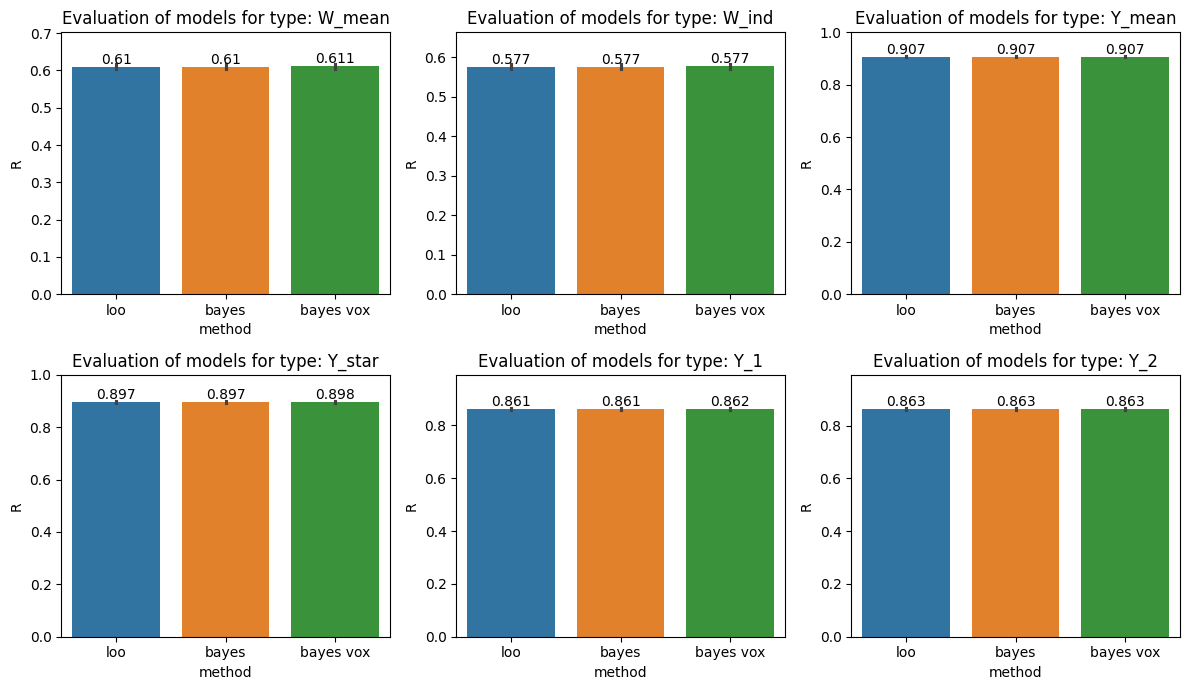

In [23]:
param_set = 3
for eval_metric in eval_metrics:
    fig, axes = plt.subplots(2, 3, figsize=(12,7))
    for i, eval_type in enumerate(eval_types.keys()):
        eval_df = pd.read_csv(save_path+f"{eval_type}_param{param_set}.tsv", sep="\t")
        plot_dataframe(eval_df, eval_type, eval_metric, axes[i // 3, i%3])

    plt.tight_layout()
    plt.show()

The set `param_set=2` has medium connectivity weights (medium mean), therefore, the $Y^*$ and $\epsilon$ are balanced. Models would try to predict in a realistic situation. I think this set is closer to real data.

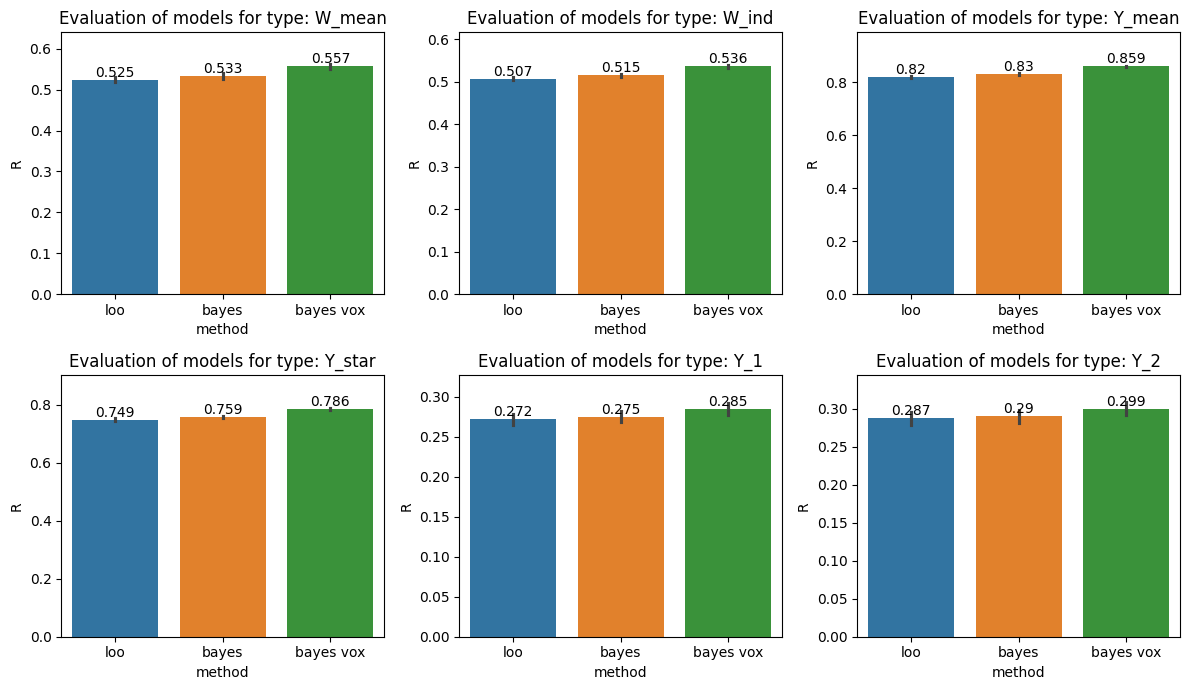

In [24]:
param_set = 2
for eval_metric in eval_metrics:
    fig, axes = plt.subplots(2, 3, figsize=(12,7))
    for i, eval_type in enumerate(eval_types.keys()):
        eval_df = pd.read_csv(save_path+f"{eval_type}_param{param_set}.tsv", sep="\t")
        plot_dataframe(eval_df, eval_type, eval_metric, axes[i // 3, i%3])

    plt.tight_layout()
    plt.show()

The set `param_set=1` has small connectivity weights (small mean), therefore, the $\epsilon$ is the dominant part of our measurments. Models would have a difficult job to predict the real data. Also, the difference between models are exagerated.

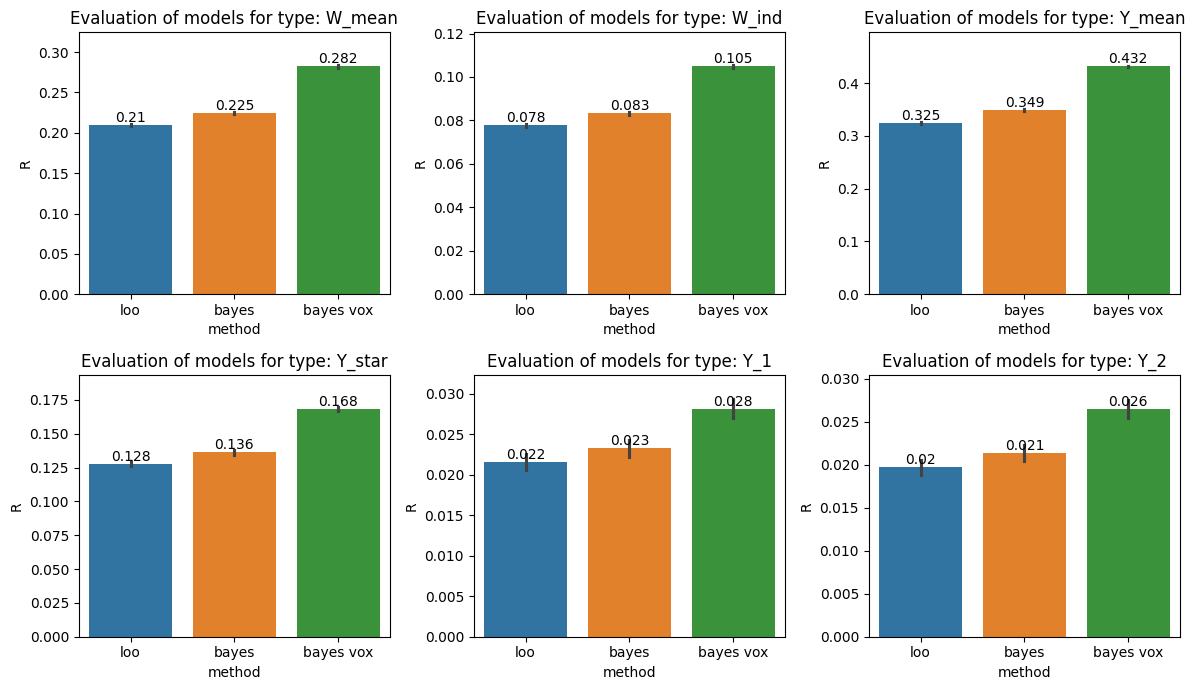

In [25]:
param_set = 1
for eval_metric in eval_metrics:
    fig, axes = plt.subplots(2, 3, figsize=(12,7))
    for i, eval_type in enumerate(eval_types.keys()):
        eval_df = pd.read_csv(save_path+f"{eval_type}_param{param_set}.tsv", sep="\t")
        plot_dataframe(eval_df, eval_type, eval_metric, axes[i // 3, i%3])

    plt.tight_layout()
    plt.show()

The set `param_set=0` are my initial estimations of MDTB. This set's connectivity weights are way smaller than of all previous sets, therefore, the prediction is too weak. In this case, the measurement noise is strongly dominant and there is nearly no correlation between Y1 and Y2. I am guessing that our estimations of $\sigma_{\epsilon}^2$ are greater than actual values.

This set is also sensitive to the generated random data, as the predictions change for every run.

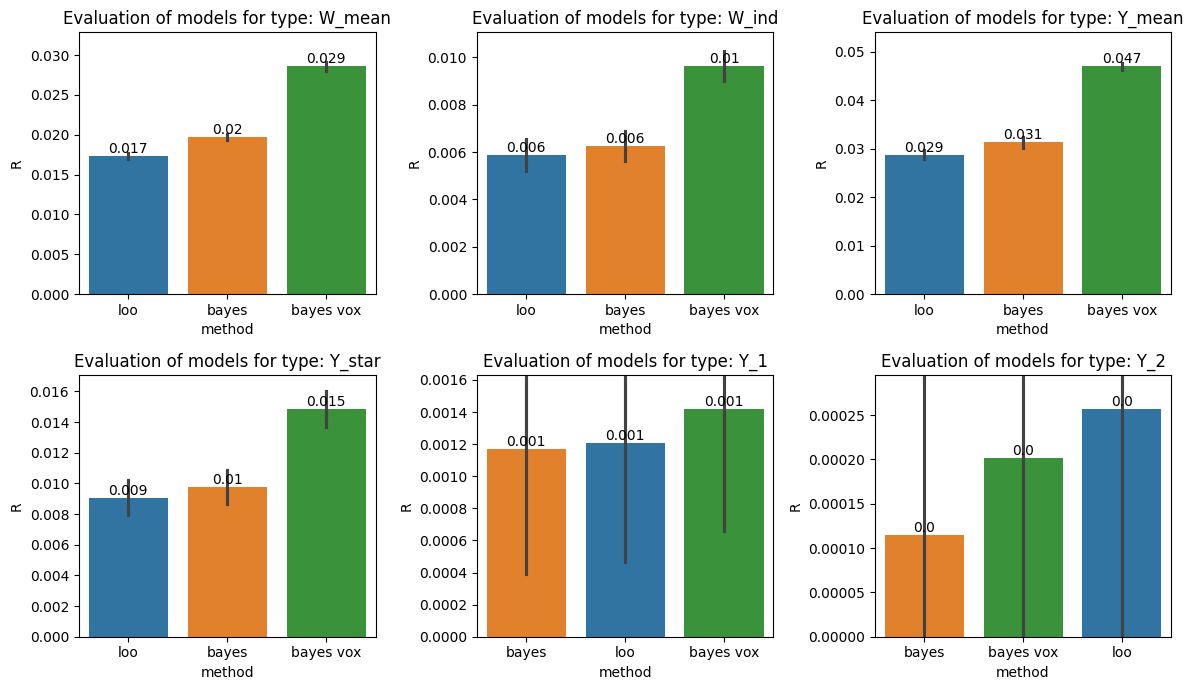

In [27]:
param_set = 0
for eval_metric in eval_metrics:
    fig, axes = plt.subplots(2, 3, figsize=(12,7))
    for i, eval_type in enumerate(eval_types.keys()):
        eval_df = pd.read_csv(save_path+f"{eval_type}_param{param_set}.tsv", sep="\t")
        plot_dataframe(eval_df, eval_type, eval_metric, axes[i // 3, i%3])

    plt.tight_layout()
    plt.show()